In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

import env

In [2]:
from typing import Tuple


def load_scenario_data(name: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    scenario_path = Path("../" / env.OUTPUT_DIR / name)
    # scenario_path = Path("../output-2024-06-03_22:30:31") / name

    trips_df: pd.DataFrame = None
    route_times = []
    elapsed_times = []
    for directory in scenario_path.iterdir():
        try:
            scenario_df = pd.read_csv(directory / "trips.csv", skipinitialspace=True)
            trips_df = pd.concat([trips_df, scenario_df], ignore_index=True)

            with open(directory / "results.txt", "r") as f:
                lines = f.readlines()
                route_times.append(float(lines[3].split()[2]))
                elapsed_times.append(float(lines[5].split()[2]))

        except Exception:
            pass

    routes_df = pd.DataFrame(
        {"ROUTE_TIMES": route_times, "ELAPSED_TIMES": elapsed_times}
    )

    return (trips_df, routes_df)

In [3]:
# scenarios_data = {
#     "ScenarioZero": load_scenario_data("ScenarioZero"),
#     "ScenarioOne": load_scenario_data("ScenarioOne"),
# }

trips, route_results = load_scenario_data("ScenarioZero")

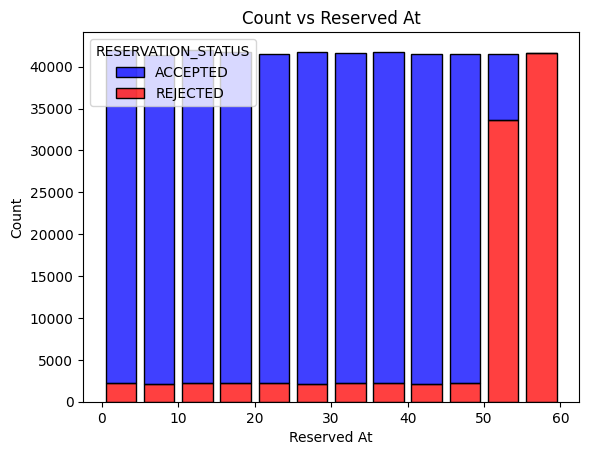

In [4]:
import seaborn as sns

colors = {"ACCEPTED": "blue", "REJECTED": "red"}

# Use seaborn to create the bar plot
trips_df = trips
sns.histplot(
    data=trips_df,
    x="RESERVED_AT",
    hue="RESERVATION_STATUS",
    multiple="stack",
    palette=colors,
    shrink=0.8,
    bins=range(0, 61, 5),
)
plt.xlabel("Reserved At")
plt.ylabel("Count")
plt.title("Count vs Reserved At")
plt.show()

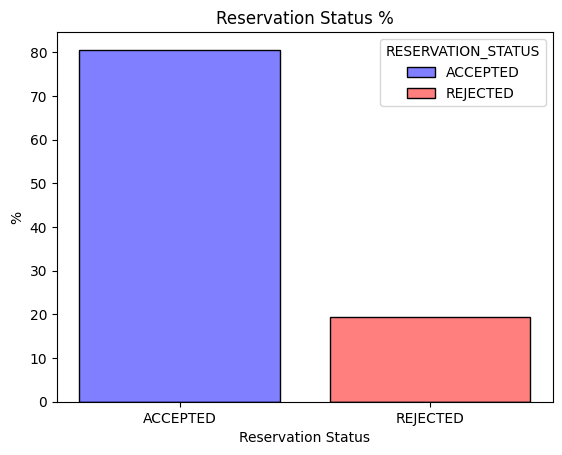

In [5]:
colors = {"ACCEPTED": "blue", "REJECTED": "red"}
sns.histplot(
    data=trips_df,
    x="RESERVATION_STATUS",
    stat="percent",
    hue="RESERVATION_STATUS",
    palette=colors,
    shrink=0.8,
    bins=range(0, 61, 5),
)

plt.xlabel("Reservation Status")
plt.ylabel("%")
plt.title("Reservation Status %")
plt.show()

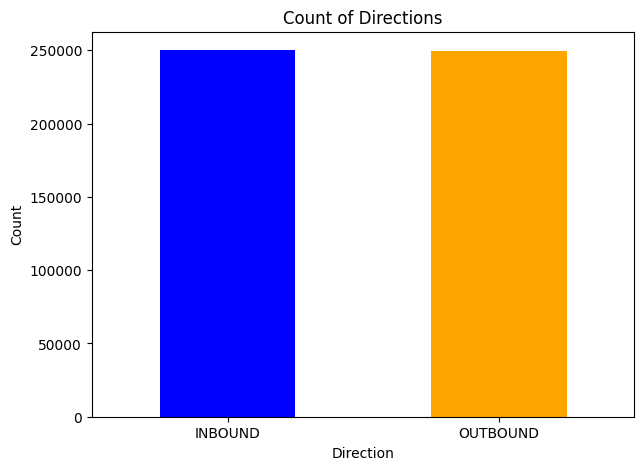

In [6]:
trips_df = trips
direction_counts = trips_df["DIRECTION"].value_counts()
plt.figure(figsize=(7, 5))
direction_counts.plot(kind="bar", color=["blue", "orange"])
plt.xlabel("Direction")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Count of Directions")
plt.show()

In [7]:
def plot_kde_for(df, x: str, hue: str = None, pallete: list = None):
    sns.kdeplot(
        data=df,
        x=x,
        hue=hue,
        fill=True,
        common_norm=False,
        palette=pallete,
        alpha=0.5,
        linewidth=0,
    )


routes_df = None
scenario_routes_df = route_results
scenario_routes_df["NAME"] = "Scenario Zero"
routes_df = pd.concat([routes_df, scenario_routes_df], ignore_index=True)

# plot_kde_for(routes_df, "ROUTE_TIMES", "NAME", ["red", "blue"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


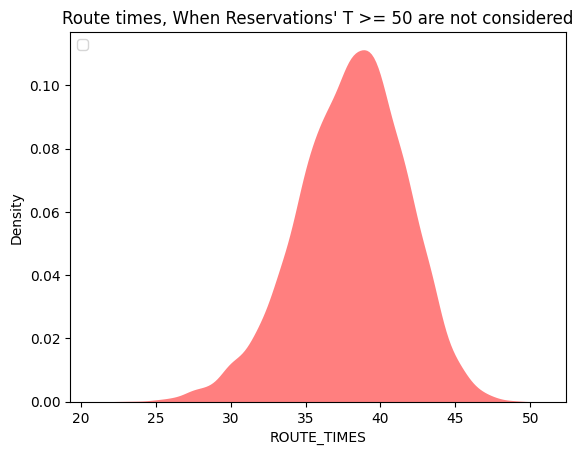

In [8]:
scenario_zero_routes_df = routes_df[routes_df["NAME"] == "Scenario Zero"]

plot_kde_for(scenario_zero_routes_df, "ROUTE_TIMES", "NAME", ["red"])
plt.title(
    f"Route times, When Reservations' T >= {env.RESERVATION_CUTOFF} are not considered"
)
plt.legend(loc="upper left")

Text(0.5, 1.0, "Computation Elapsed time, When Reservations' T >= 50 are not considered")

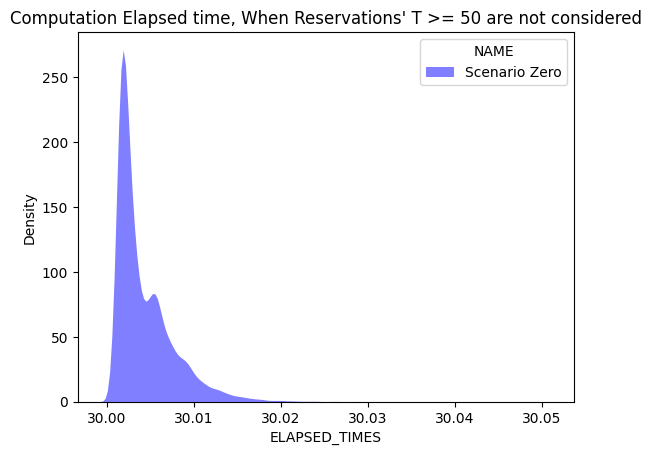

In [9]:
plot_kde_for(scenario_zero_routes_df, "ELAPSED_TIMES", "NAME", ["blue"])
plt.title(
    f"Computation Elapsed time, When Reservations' T >= {env.RESERVATION_CUTOFF} are not considered"
)

/tmp/ipykernel_5286/1641299612.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


<Axes: xlabel='ROUTE_TIMES', ylabel='Count'>

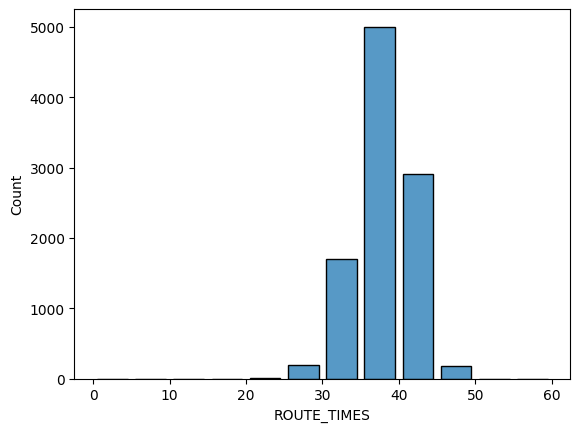

In [10]:
sns.histplot(
    data=scenario_zero_routes_df,
    x="ROUTE_TIMES",
    # hue="RESERVATION_STATUS",
    multiple="stack",
    palette=colors,
    shrink=0.8,
    bins=range(0, 61, 5),
)

In [11]:
# scenario_one_routes_df = routes_df[routes_df["NAME"] == "ScenarioOne"]

# plot_kde_for(scenario_one_routes_df, "ROUTE_TIMES", "NAME", ["blue"])
# plt.title("When Reservations' T >= 50 are considered")
# plt.legend(loc="upper left")

In [12]:
import numpy as np

# Calculate the mean and variance for each column
mean = np.mean(route_results["ROUTE_TIMES"], axis=0)
variance = np.var(route_results["ROUTE_TIMES"], axis=0)

print("Mean Route time: ", mean, " minutes")
print("Route time Variance: ", variance, " minutes")

Mean Route time:  38.031851  minutes
Route time Variance:  12.958787143799  minutes
